In [18]:
import pandas as pd
import json

file_path = 'others/Tipos de tumores.xlsx'
df = pd.read_excel(file_path)
    
# df.to_csv('tasas-de-las-principales-causas-de-muerte-.csv', index=False)
# df.drop(df.index[0], inplace=True)

json_list = []

for index, row in df.iterrows():
    row_dict = {}
    for column_name, value in row.items():
        row_dict[column_name] = value
    json_list.append(row_dict)

output_json_file = 'output3.json'
with open(output_json_file, 'w') as json_file:
    json.dump(json_list, json_file, indent=4)

print(f'Se han guardado los datos en {output_json_file}')

Se han guardado los datos en output8.json


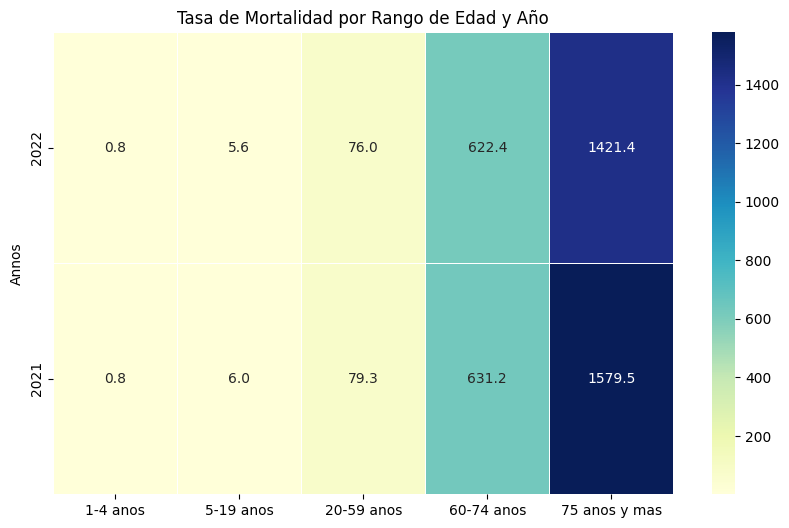

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
datas = pd.read_json('output2.json')
df = pd.DataFrame(datas)
for col in df.columns[1:]:  
    if df[col].dtype == 'object':  
        df[col] = df[col].str.replace(',', '.').str.replace(' ', '').astype(float)

df.set_index('Annos', inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=0.5, ax=ax)
ax.set_title('Tasa de Mortalidad por Rango de Edad y Año')
plt.show(fig)   

In [ ]:
data = pd.read_json("output.json")
df = pd.DataFrame(data)
df_long = df.melt(id_vars="enfermedades", var_name="Año", value_name="Número de Muertes")
df_long

,enfermedades,Año,Número de Muertes
0,Tumores malignos,2000,146.1
1,Influenza y neumonia,2000,51.0
2,Enfermedades cerebrovasculares,2000,72.4
3,COVID-19,2000,0.0
4,Accidentes,2000,44.1
...,...,...,...
225,Enfermedades cronicas de las vias respiratoria...,2022,38.2
226,"Enfermedades de las arterias, artereolas y vas...",2022,25.7
227,Diabetes mellitus,2022,22.6
228,Cirrosis y otras enfermedades crónicas del hi...,2022,16.4
